In [2]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
print(x_train[0].shape)


(28, 28)


In [6]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [9]:
hist=model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 323s 5ms/sample - loss: 0.6428 - acc: 0.7888 - val_loss: 0.1623 - val_acc: 0.9496
Epoch 2/15
60000/60000 [==============================] - 255s 4ms/sample - loss: 0.1645 - acc: 0.9557 - val_loss: 0.1168 - val_acc: 0.9665
Epoch 3/15
60000/60000 [==============================] - 259s 4ms/sample - loss: 0.1150 - acc: 0.9702 - val_loss: 0.0862 - val_acc: 0.9773
Epoch 4/15
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.0869 - acc: 0.9776 - val_loss: 0.0656 - val_acc: 0.9816
Epoch 5/15
60000/60000 [==============================] - 266s 4ms/sample - loss: 0.0742 - acc: 0.9805 - val_loss: 0.0626 - val_acc: 0.9833
Epoch 6/15
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.0618 - acc: 0.9832 - val_loss: 0.0521 - val_acc: 0.9872
Epoch 7/15
60000/60000 [==============================] - 262s 4ms/sample - loss: 0.0507 - acc: 0.9866 - val_l

In [10]:
test_score=model.evaluate(x_test,y_test)
print("test loss{:4f},accuracy{:2f}%".format(test_score[0],test_score[1]*100))


10000/10000 [==============================] - 8s 768us/sample - loss: 0.0407 - acc: 0.9910
test loss0.040735,accuracy99.100000%


Text(0, 0.5, 'acc')

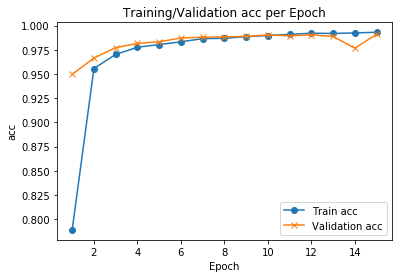

In [17]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

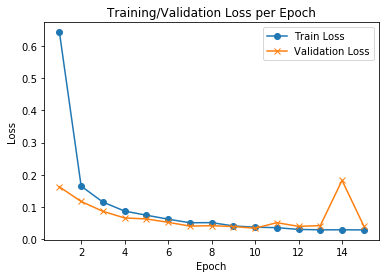

In [16]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')